/tmp/ipykernel_1141514/157346037.py:92: UserWarning: Glyph 23548 (\N{CJK UNIFIED IDEOGRAPH-5BFC}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_1141514/157346037.py:92: UserWarning: Glyph 24377 (\N{CJK UNIFIED IDEOGRAPH-5F39}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_1141514/157346037.py:92: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_1141514/157346037.py:92: UserWarning: Glyph 21521 (\N{CJK UNIFIED IDEOGRAPH-5411}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_1141514/157346037.py:92: UserWarning: Glyph 20301 (\N{CJK UNIFIED IDEOGRAPH-4F4D}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_1141514/157346037.py:92: UserWarning: Glyph 32622 (\N{CJK UNIFIED IDEOGRAPH-7F6E}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_1141514/157346037.py:92: UserWarning: Glyph 24452 (\N{CJK UNIFIED IDEOGRAPH-5F84}) missing from current font.

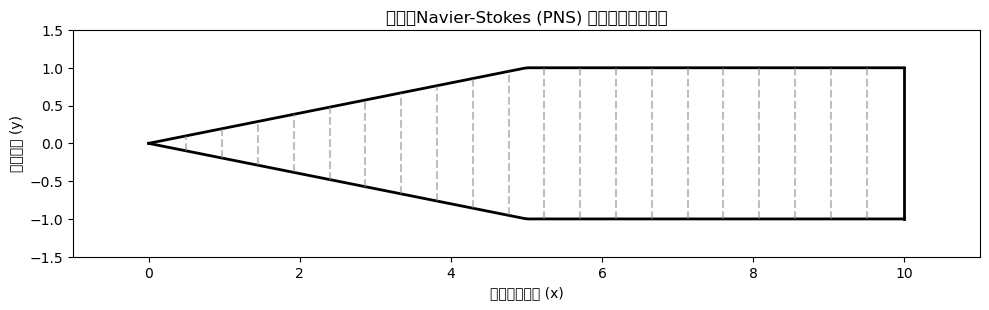

In [4]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

# --- 动画参数 ---
N_SLICES = 20  # 计算截面的数量
MISSILE_LENGTH = 10.0
MISSILE_HALF_WIDTH_BASE = 1.0
ANIMATION_INTERVAL = 1000  # 动画帧之间的毫秒间隔

# --- 导弹外形函数 (简单楔形) ---
def missile_profile(x):
    if x < 0:
        return 0
    elif x < MISSILE_LENGTH / 2:
        return (MISSILE_HALF_WIDTH_BASE / (MISSILE_LENGTH / 2)) * x
    elif x <= MISSILE_LENGTH:
        return MISSILE_HALF_WIDTH_BASE
    else:
        return MISSILE_HALF_WIDTH_BASE # Or some tail cone logic

# --- 设置画布 ---
fig, ax = plt.subplots(figsize=(10, 3))
ax.set_xlim(-1, MISSILE_LENGTH + 1)
ax.set_ylim(-MISSILE_HALF_WIDTH_BASE * 1.5, MISSILE_HALF_WIDTH_BASE * 1.5)
ax.set_xlabel("导弹轴向位置 (x)")
ax.set_ylabel("径向位置 (y)")
ax.set_title("抛物化Navier-Stokes (PNS) 空间推进算法示意")
ax.set_aspect('equal', adjustable='box')

# 绘制导弹轮廓线
x_coords_missile = np.linspace(0, MISSILE_LENGTH, 200)
y_coords_missile_upper = np.array([missile_profile(x) for x in x_coords_missile])
y_coords_missile_lower = -y_coords_missile_upper
ax.plot(x_coords_missile, y_coords_missile_upper, 'k-', lw=2)
ax.plot(x_coords_missile, y_coords_missile_lower, 'k-', lw=2)
ax.plot([0,0], [-missile_profile(0), missile_profile(0)], 'k-', lw=2) # Nose
ax.plot([MISSILE_LENGTH, MISSILE_LENGTH], [-missile_profile(MISSILE_LENGTH), missile_profile(MISSILE_LENGTH)], 'k-', lw=2) # Base

# 计算截面的x坐标
slice_x_positions = np.linspace(0.05 * MISSILE_LENGTH, 0.95 * MISSILE_LENGTH, N_SLICES)

# 初始化计算截面线对象 (最初不可见或用浅色表示)
lines = []
for x_pos in slice_x_positions:
    y_max = missile_profile(x_pos)
    line, = ax.plot([x_pos, x_pos], [-y_max, y_max], 'gray', linestyle='--', alpha=0.5) # 初始为灰色虚线
    lines.append(line)

# --- 动画更新函数 ---
def update(frame_num):
    """
    更新动画的每一帧。
    frame_num: 当前帧的编号 (从0开始)
    """
    if frame_num < N_SLICES:
        # "激活" 当前截面，改变颜色和样式
        lines[frame_num].set_color('blue')
        lines[frame_num].set_linestyle('-')
        lines[frame_num].set_alpha(1.0)
        lines[frame_num].set_linewidth(1.5)

        # （可选）添加一些简单的粒子效果或颜色填充来示意计算
        # 例如，在当前截面附近随机散点
        if frame_num > 0: # 避免在第一帧之前绘制
            num_particles = 20
            x_center = slice_x_positions[frame_num]
            y_max_current = missile_profile(x_center)
            # 确保粒子在导弹轮廓内
            particles_x = np.random.normal(x_center, MISSILE_LENGTH*0.01, num_particles)
            particles_y = np.random.uniform(-y_max_current, y_max_current, num_particles)

            # 清除上一帧的粒子 (如果需要更复杂的粒子动画，需要更精细的管理)
            for artist in ax.collections:
                artist.remove()
            ax.scatter(particles_x, particles_y, s=5, color='red', alpha=0.6)

        ax.set_title(f"PNS 空间推进算法示意: 正在计算第 {frame_num + 1}/{N_SLICES} 个截面")

    elif frame_num == N_SLICES:
        ax.set_title(f"PNS 空间推进算法示意: 所有 {N_SLICES} 个截面计算完成!")
        # （可选）清除最后的粒子
        for artist in ax.collections:
                artist.remove()
    return lines

# --- 创建动画 ---
# frames 可以设置为 N_SLICES + 一些额外的帧数用于显示最终状态或清除
ani = animation.FuncAnimation(fig, update, frames=N_SLICES + 5,
                              interval=ANIMATION_INTERVAL, blit=False, repeat=False)

plt.tight_layout()
plt.show()

# 如果您想保存动画为gif (可能需要安装imagemagick或ffmpeg):
# print("正在尝试保存动画为 gif...")
# try:
#     ani.save('pns_space_marching_conceptual.gif', writer='imagemagick', fps=5)
#     print("动画已保存为 pns_space_marching_conceptual.gif")
# except Exception as e:
#     print(f"保存gif失败: {e}")
#     print("请确保已安装imagemagick并配置正确，或者尝试其他writer如'ffmpeg'。")

The shape of `triangles.npy` is (334139, 3) and the shape of `vertices.npy` is (2, 201640).

This means:
*   There are 334,139 triangles.
*   Each triangle is defined by 3 vertex indices.
*   There are 201,640 vertices.
*   For each vertex, there are 2 coordinates (presumably longitude and latitude).

However, the `vertices` array shape `(2, 201640)` is a bit unusual for typical usage with Matplotlib's `tripcolor` or similar functions, which usually expect vertices as `(num_vertices, num_dimensions_per_vertex)`, e.g., `(201640, 2)`.

We should load and inspect `vertices.npy` to confirm its structure and transpose it if necessary before using it for plotting. The salinity data (or any data to be visualized on the mesh) should have a value for each of these 201,640 vertices.